In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
from string import punctuation
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [37]:
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('tab10')

In [38]:
df = pd.read_csv('the_office.csv', index_col=0)
df.head()

,character,line,season,episode
0,Michael,All right Jim. Your quarterlies look very goo...,1,1
1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1
2,Michael,So you’ve come to the master for guidance? Is...,1,1
3,Jim,"Actually, you called me in here, but yeah.",1,1
4,Michael,"All right. Well, let me show you how it’s don...",1,1


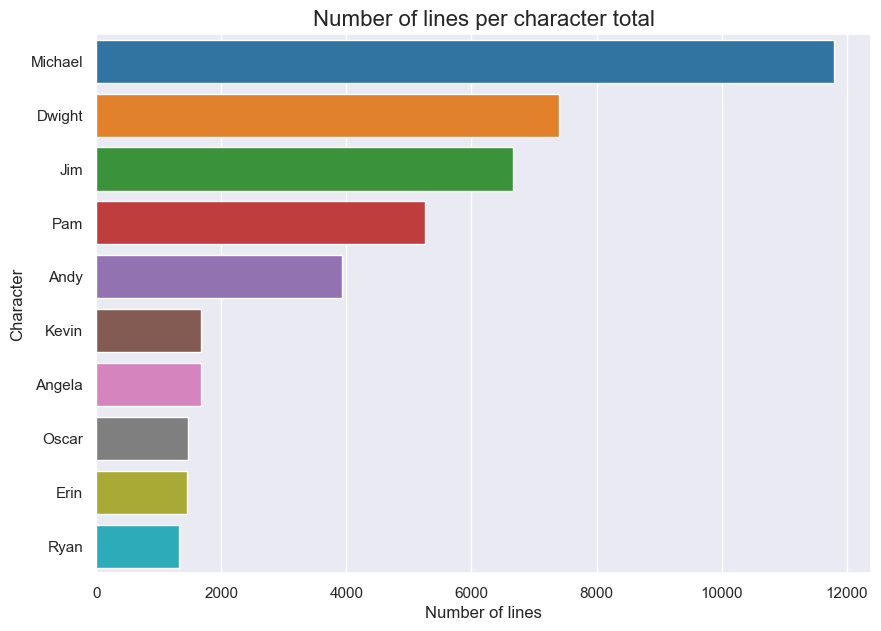

In [39]:
counts = df['character'].value_counts()[:10].sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x=counts, y=counts.index)
plt.title('Number of lines per character total', fontsize=16)
plt.xlabel('Number of lines', fontsize=12)
plt.ylabel('Character', fontsize=12)
plt.show()

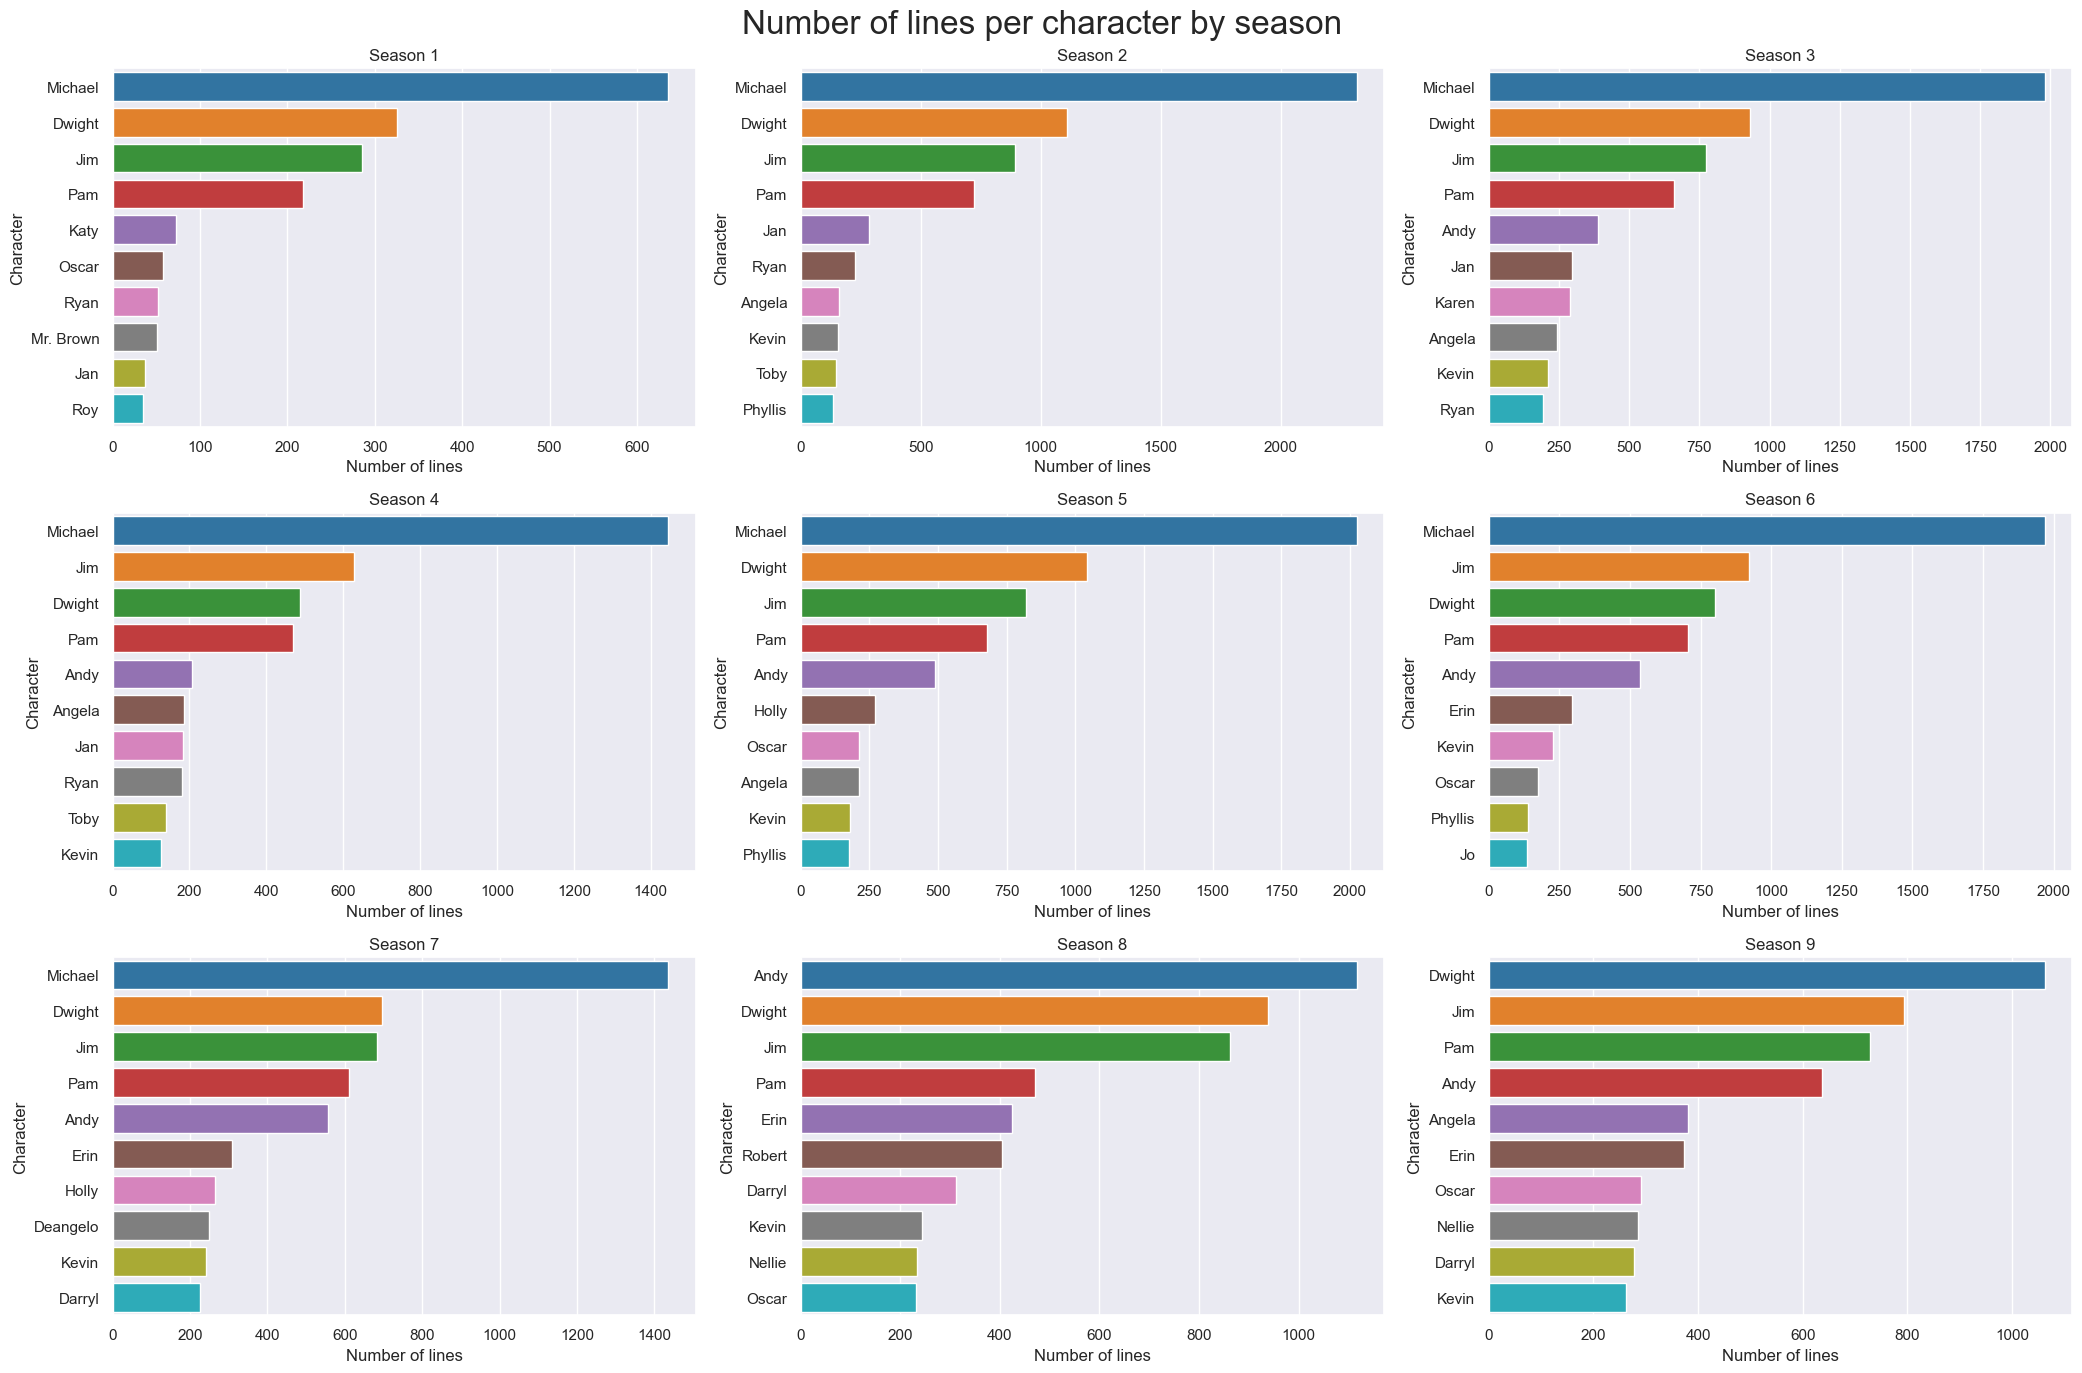

In [40]:
fig, ax = plt.subplots(3, 3, figsize=(21, 14))
for season in df['season'].unique():
    plt.subplot(3, 3, season)
    counts = df.loc[df.season == season, 'character'].value_counts()[:10].sort_values(ascending=False)
    sns.barplot(x=counts, y=counts.index)
    plt.title('Season ' + str(season))
    plt.xlabel('Number of lines', fontsize=12)
    plt.ylabel('Character', fontsize=12)
    
plt.suptitle('Number of lines per character by season', fontsize=24)
fig.tight_layout()
plt.show()

In [41]:
english_stopwords = stopwords.words('english')
custom_stopwords = ['oh', 'uh', 'um', 'yeah', 'okay', 'ok', 'right', 'alright', 'like', 'know', 'hey', 'gonna']
english_stopwords.extend(custom_stopwords)

tidytext_stopwords = pd.read_csv(
    "https://raw.githubusercontent.com/juliasilge/tidytext/master/data-raw/stop_words.csv"
)
more_stopwords = list(tidytext_stopwords['word'])
english_stopwords.extend(more_stopwords)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\[[^\]]*\]', '', text)
    text = re.sub(f'[{re.escape(punctuation)}]', '', text)
    words = [word for word in text.split() if word not in english_stopwords]
    text = ' '.join(words)
    return text

In [42]:
df['line_preprocessed'] = df['line'].apply(lambda x: preprocess_text(x))
df

,character,line,season,episode,line_preprocessed
0,Michael,All right Jim. Your quarterlies look very goo...,1,1,jim quarterlies library
1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1,told close
2,Michael,So you’ve come to the master for guidance? Is...,1,1,master guidance grasshopper
3,Jim,"Actually, you called me in here, but yeah.",1,1,called
4,Michael,"All right. Well, let me show you how it’s don...",1,1,
...,...,...,...,...,...
59289,Creed,It all seems so very arbitrary. I applied for...,9,23,arbitrary applied job company hiring desk empt...
59290,Meredith,I just feel lucky that I got a chance to shar...,9,23,feel lucky chance share crummy story dump pape...
59291,Phyllis,Iâ€™m happy that this was all filmed so I can...,9,23,happy filmed remember paper company wrote
59292,Jim,I sold paper at this company for 12 years. My...,9,23,sold paper company job speak clients phone qua...


In [51]:
def get_top_n_words(text, n_words=10):
    words = text.split()
    word_counts = Counter(words)
    top_words = [word[0] for word in word_counts.most_common(n_words)]
    return top_words

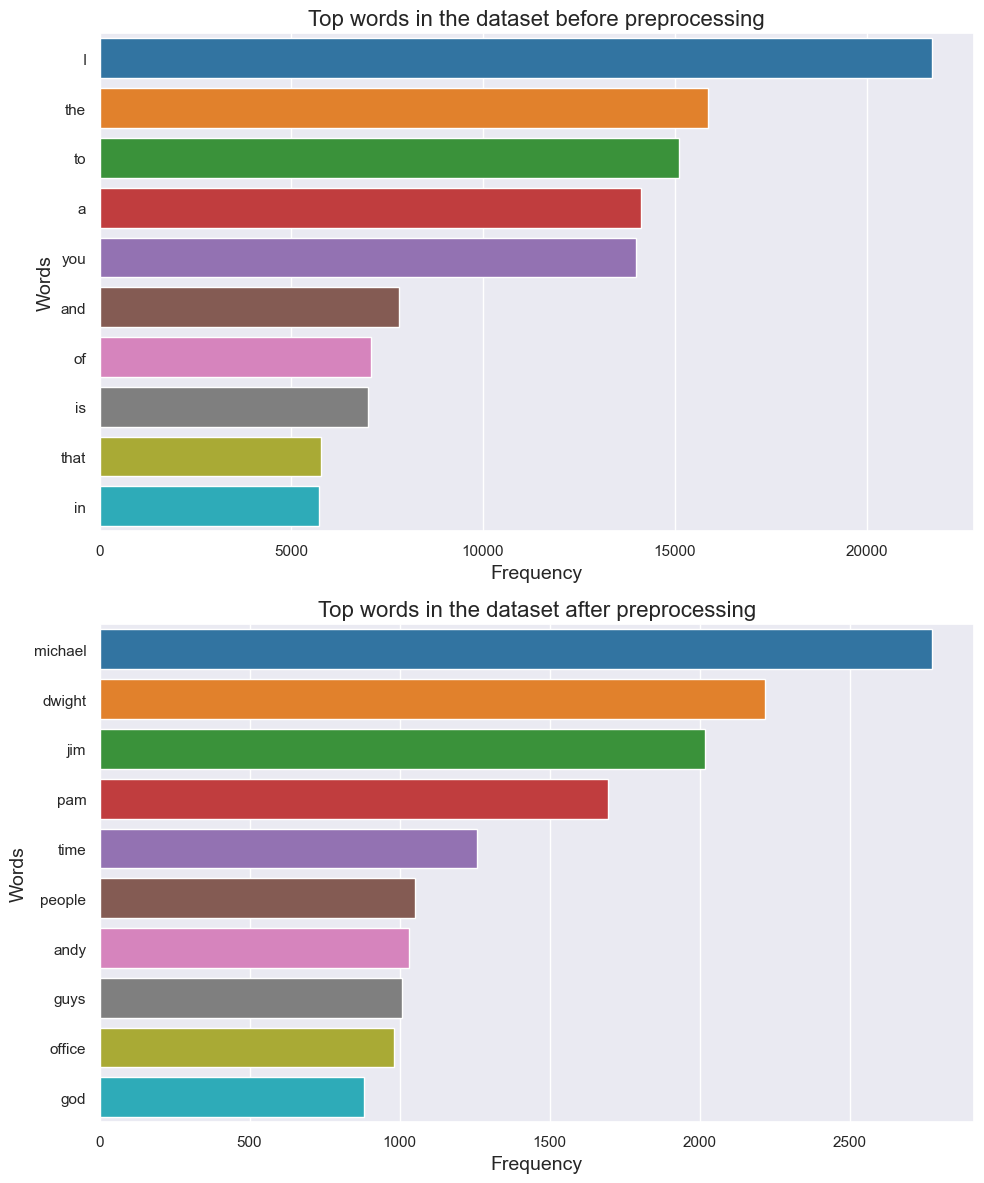

In [44]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 12))

all_lines = ' '.join(df['line'])
top_words = get_top_n_words(all_lines)
counts = [all_lines.split().count(word) for word in top_words]

sns.barplot(x=counts, y=top_words, ax=ax1)
ax1.set_title('Top words in the dataset before preprocessing', fontsize=16)
ax1.set_xlabel('Frequency', fontsize=14)
ax1.set_ylabel('Words', fontsize=14)

all_lines = ' '.join(df['line_preprocessed'])
top_words = get_top_n_words(all_lines)
counts = [all_lines.split().count(word) for word in top_words]

sns.barplot(x=counts, y=top_words, ax=ax2)
ax2.set_title('Top words in the dataset after preprocessing', fontsize=16)
ax2.set_xlabel('Frequency', fontsize=14)
ax2.set_ylabel('Words', fontsize=14)
plt.tight_layout()
plt.show()

In [45]:
top_characters = list(df['character'].value_counts()[:9].sort_values(ascending=False).index)

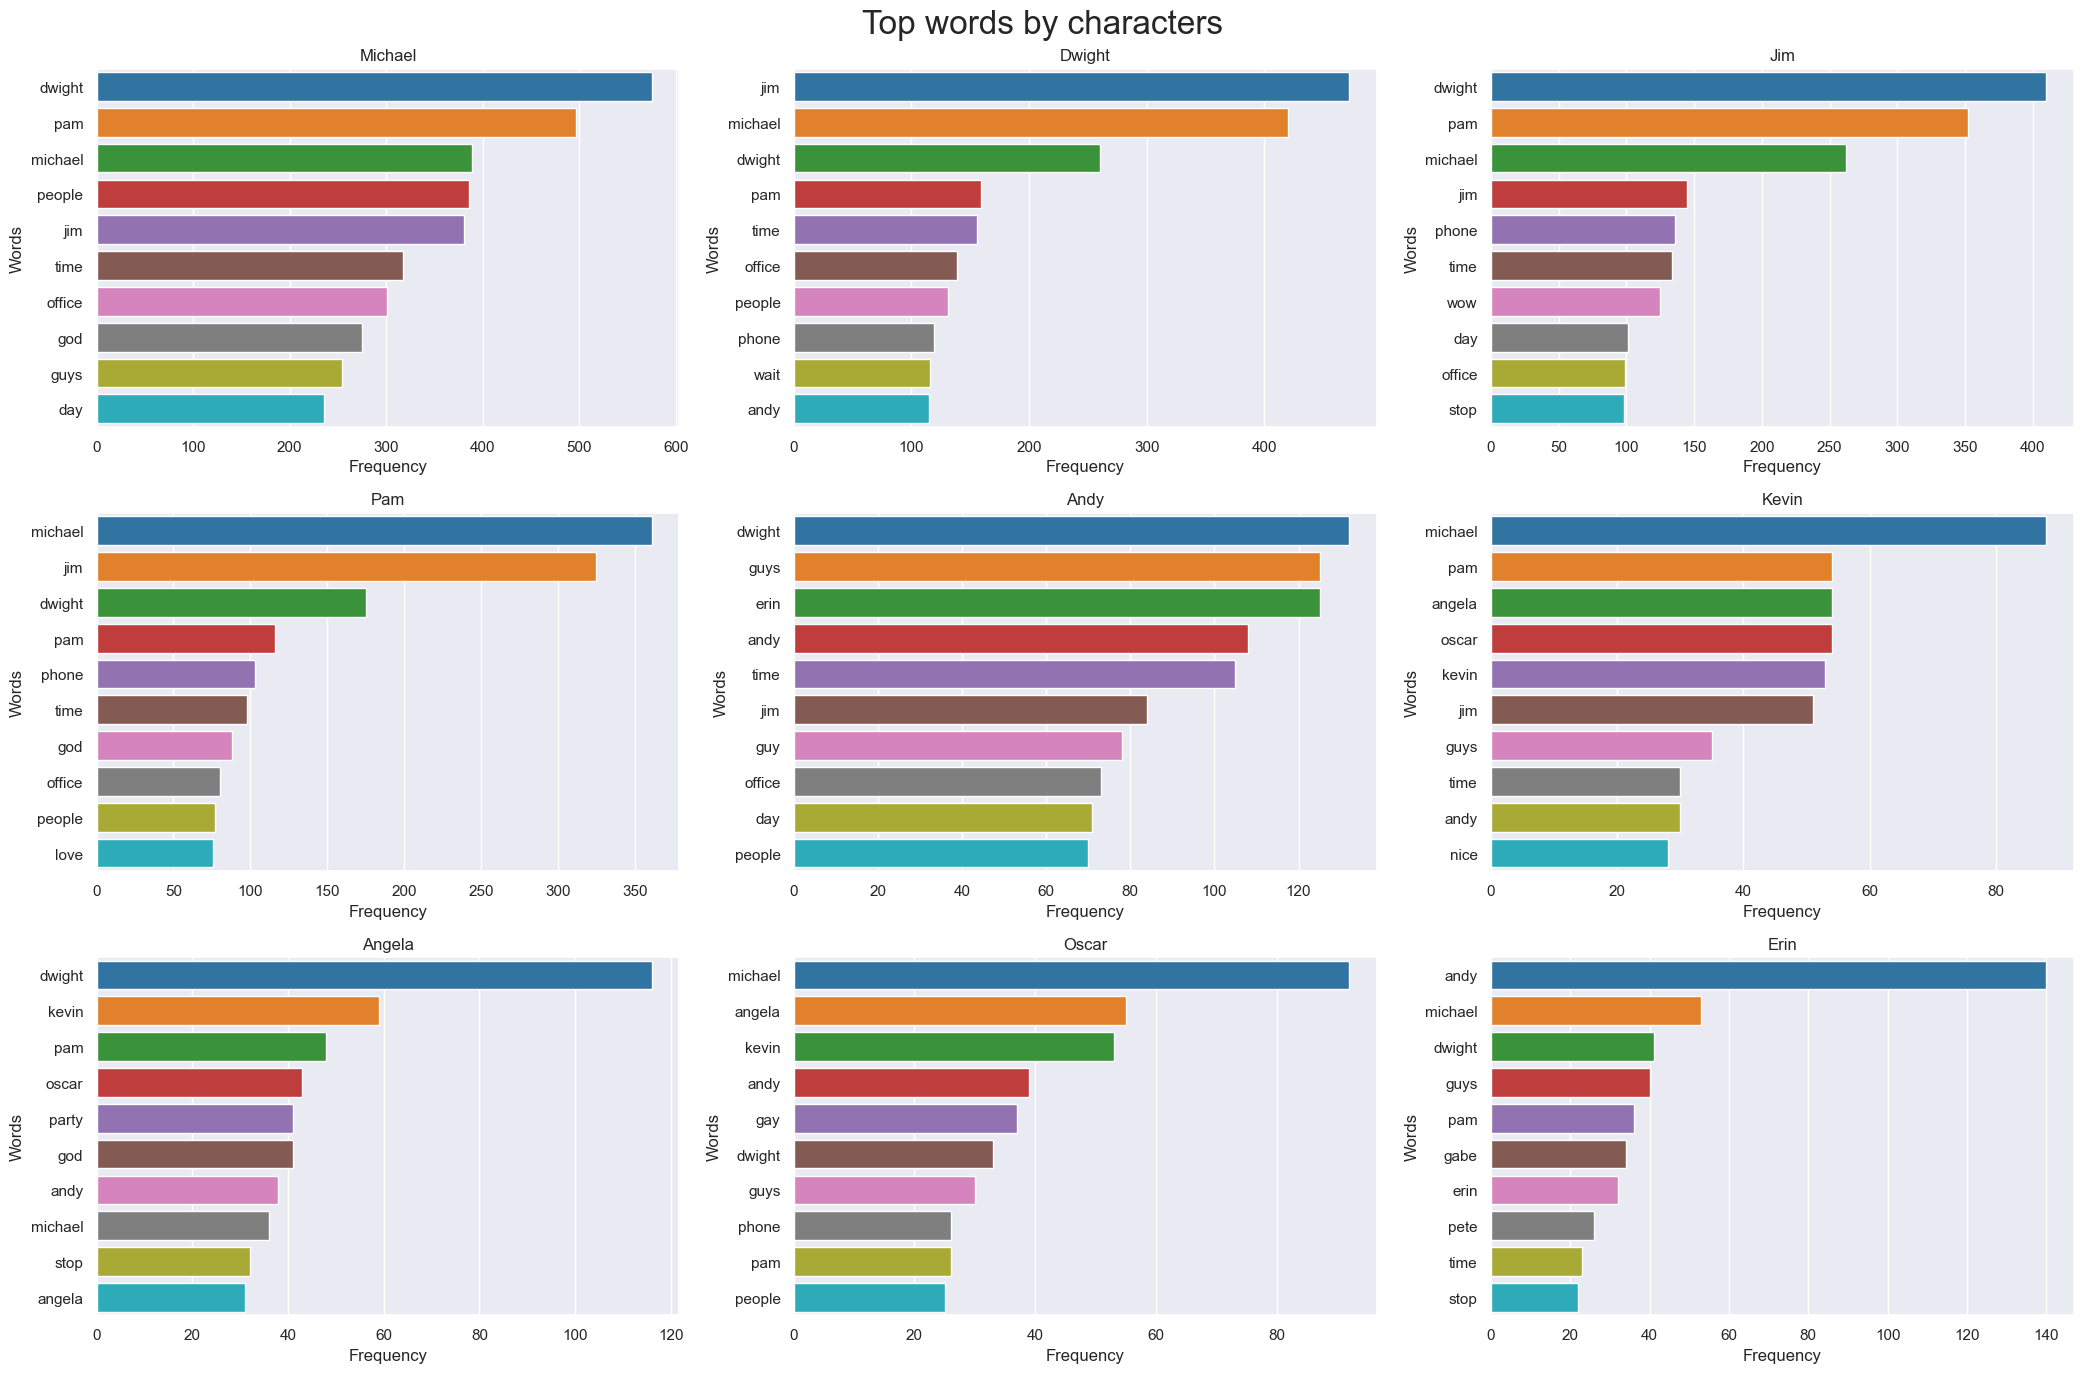

In [46]:
fig, ax = plt.subplots(3, 3, figsize=(21, 14))
index = 1
for character in top_characters:
    plt.subplot(3, 3, index)
    lines = df.loc[df['character'] == character, 'line_preprocessed']
    all_lines = ' '.join(lines)
    top_words = get_top_n_words(all_lines)
    counts = [all_lines.split().count(word) for word in top_words]
    sns.barplot(x=counts, y=top_words)
    plt.title(character)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    index += 1
    
plt.suptitle('Top words by characters', fontsize=24)
fig.tight_layout()
plt.show()

In [354]:
df = df[df['line_preprocessed'].map(lambda d: len(d)) > 0]
df.to_csv('preprocessed_df.csv')
df

,character,line,season,episode,line_preprocessed
0,Michael,All right Jim. Your quarterlies look very goo...,1,1,jim quarterlies library
1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1,told close
2,Michael,So you’ve come to the master for guidance? Is...,1,1,master guidance grasshopper
3,Jim,"Actually, you called me in here, but yeah.",1,1,called
5,Michael,"[on the phone] Yes, I’d like to speak to your...",1,1,phone speak office manager michael scott regio...
...,...,...,...,...,...
59289,Creed,It all seems so very arbitrary. I applied for...,9,23,arbitrary applied job company hiring desk empt...
59290,Meredith,I just feel lucky that I got a chance to shar...,9,23,feel lucky chance share crummy story dump pape...
59291,Phyllis,Iâ€™m happy that this was all filmed so I can...,9,23,happy filmed remember paper company wrote
59292,Jim,I sold paper at this company for 12 years. My...,9,23,sold paper company job speak clients phone qua...


In [93]:
def get_top_unique_ngrams(n_words=10, ngram_range=(1,1)):
    lines_by_character = df.groupby('character')['line_preprocessed'].apply(lambda x: ' '.join(x))

    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_df=0.02)
    tfidf = vectorizer.fit_transform(lines_by_character.values)

    tfidf_characters = ['Michael', 'Jim', 'Dwight', 'Pam', 'Andy', 'Ryan', 'Kelly', 'Kevin', 'Toby', 
                        'Angela', 'Erin', 'Oscar', 'Phyllis', 'Creed', 'Stanley', 'Meredith', 'Darryl']
    
    unique_words = {}

    feature_names = vectorizer.get_feature_names_out()
    for i, character in enumerate(lines_by_character.index):
        if character in tfidf_characters:
            tfidf_scores = tfidf[i, :].toarray()[0]
            top_indices = tfidf_scores.argsort()[-n_words:][::-1]
            top_words = {}
            for j in top_indices:
                top_words[feature_names[j]] =  tfidf_scores[j]

            unique_words[character] = top_words
    return unique_words

In [94]:
def plot_top_unique_ngrams(ngram_range=(1,1), ylabel='Words', title='Top unique words by characters'):
    top_unique_ngrams = get_top_unique_ngrams(n_words=10, ngram_range=ngram_range)

    fig, ax = plt.subplots(3, 3, figsize=(21, 14))
    index = 1
    for character in top_characters:
        plt.subplot(3, 3, index)
        top_words = list(top_unique_ngrams[character].keys())
        counts = list(top_unique_ngrams[character].values())
        sns.barplot(x=counts, y=top_words)
        plt.title(character)
        plt.xlabel('TF-IDF score')
        plt.ylabel(ylabel)
        index += 1

    plt.suptitle(title, fontsize=24)
    fig.tight_layout()
    plt.show()

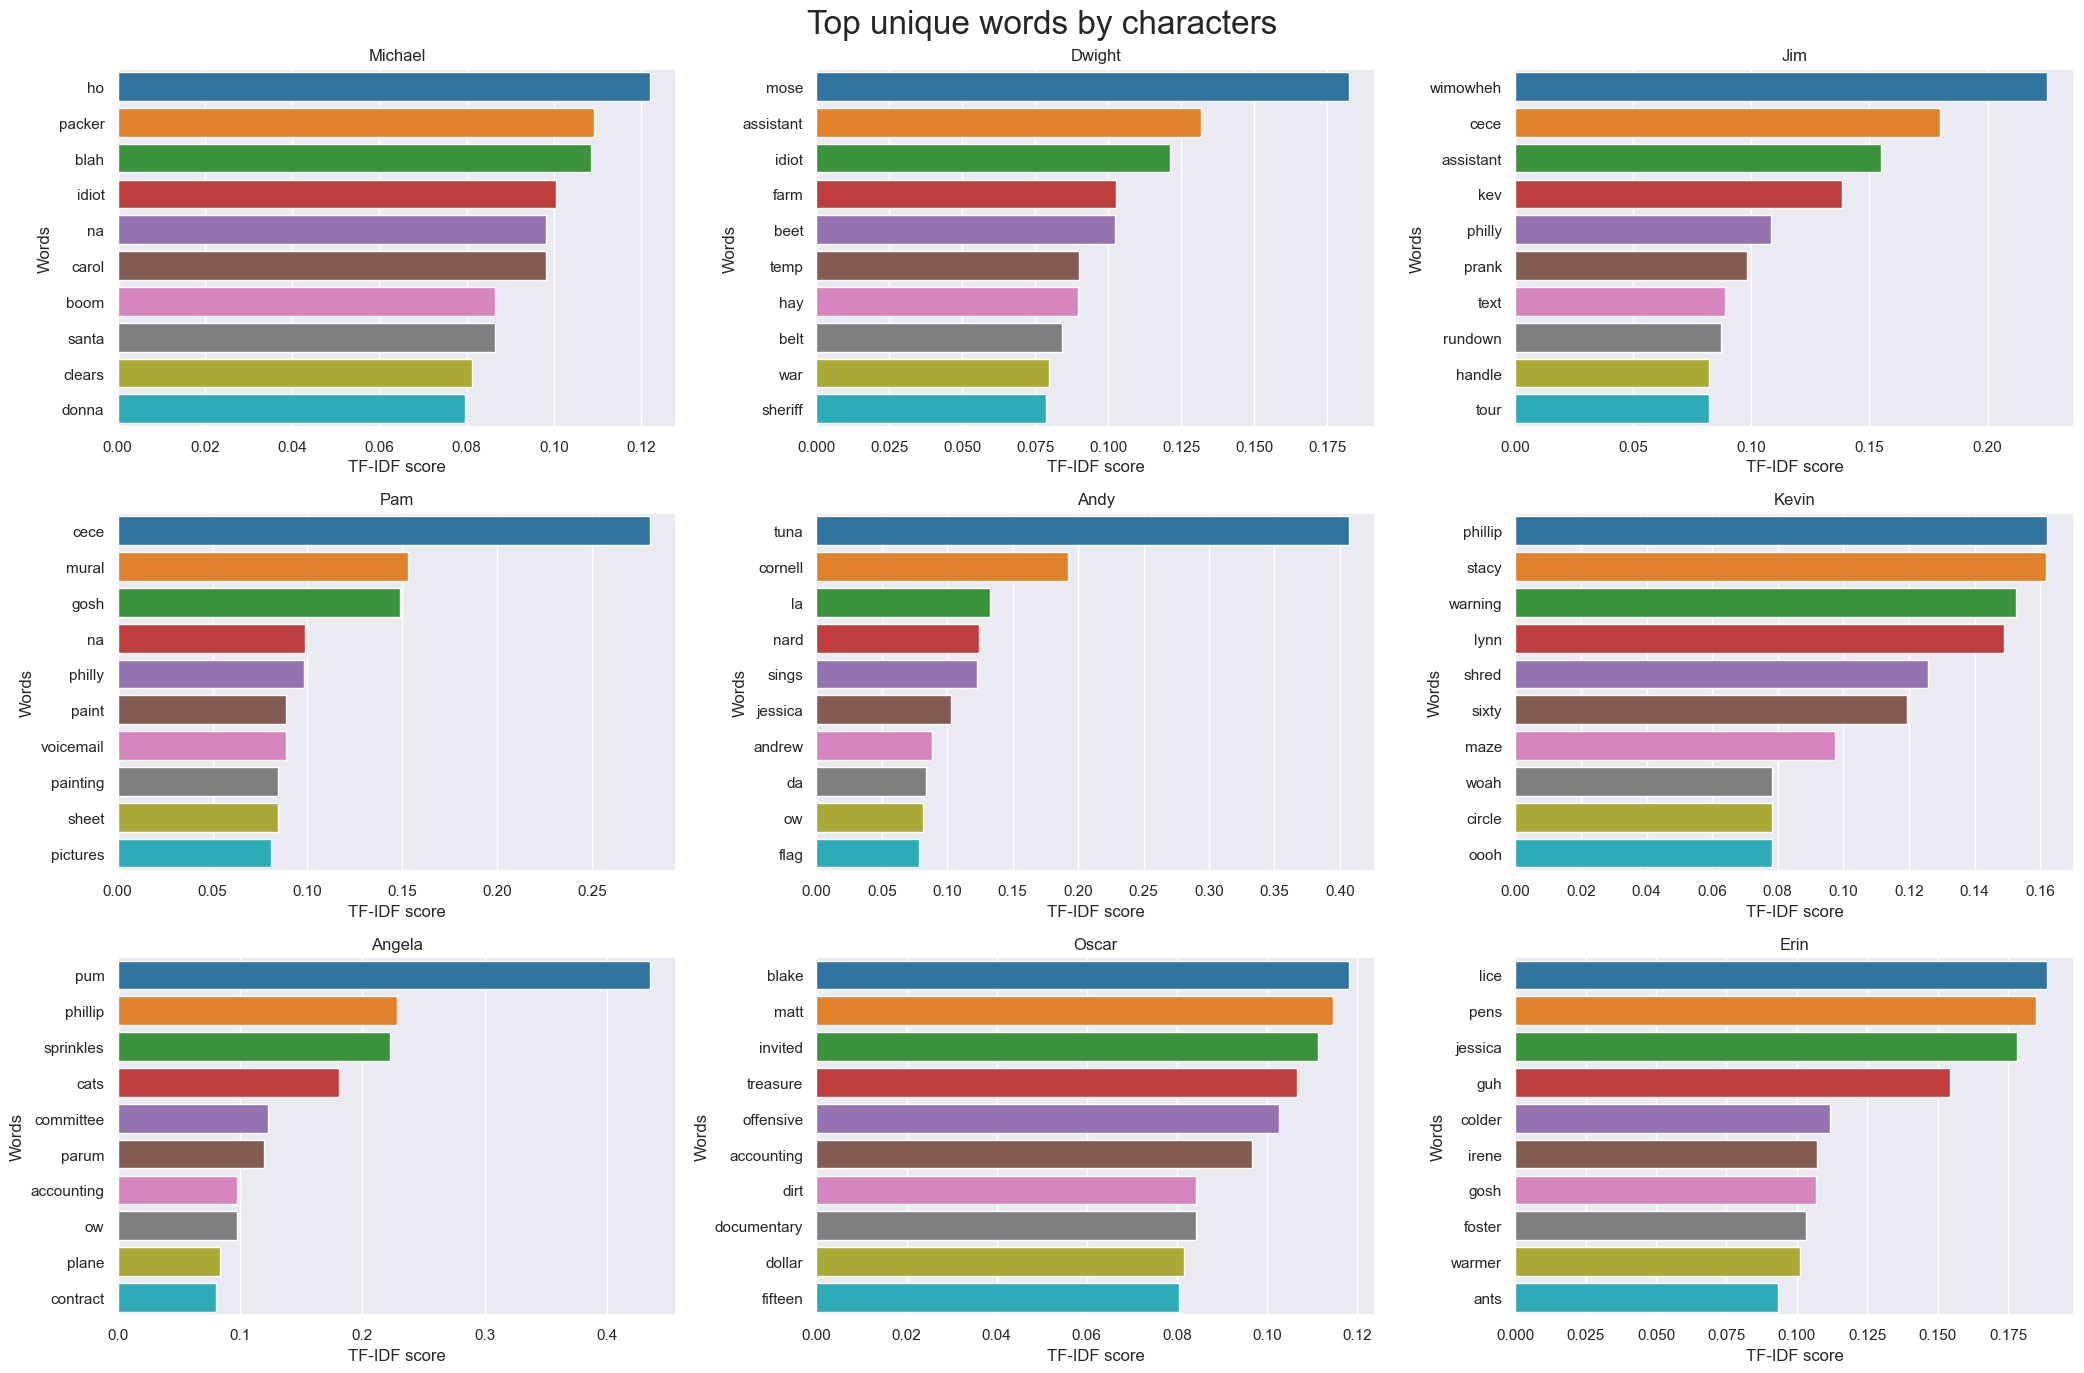

In [95]:
plot_top_unique_ngrams()

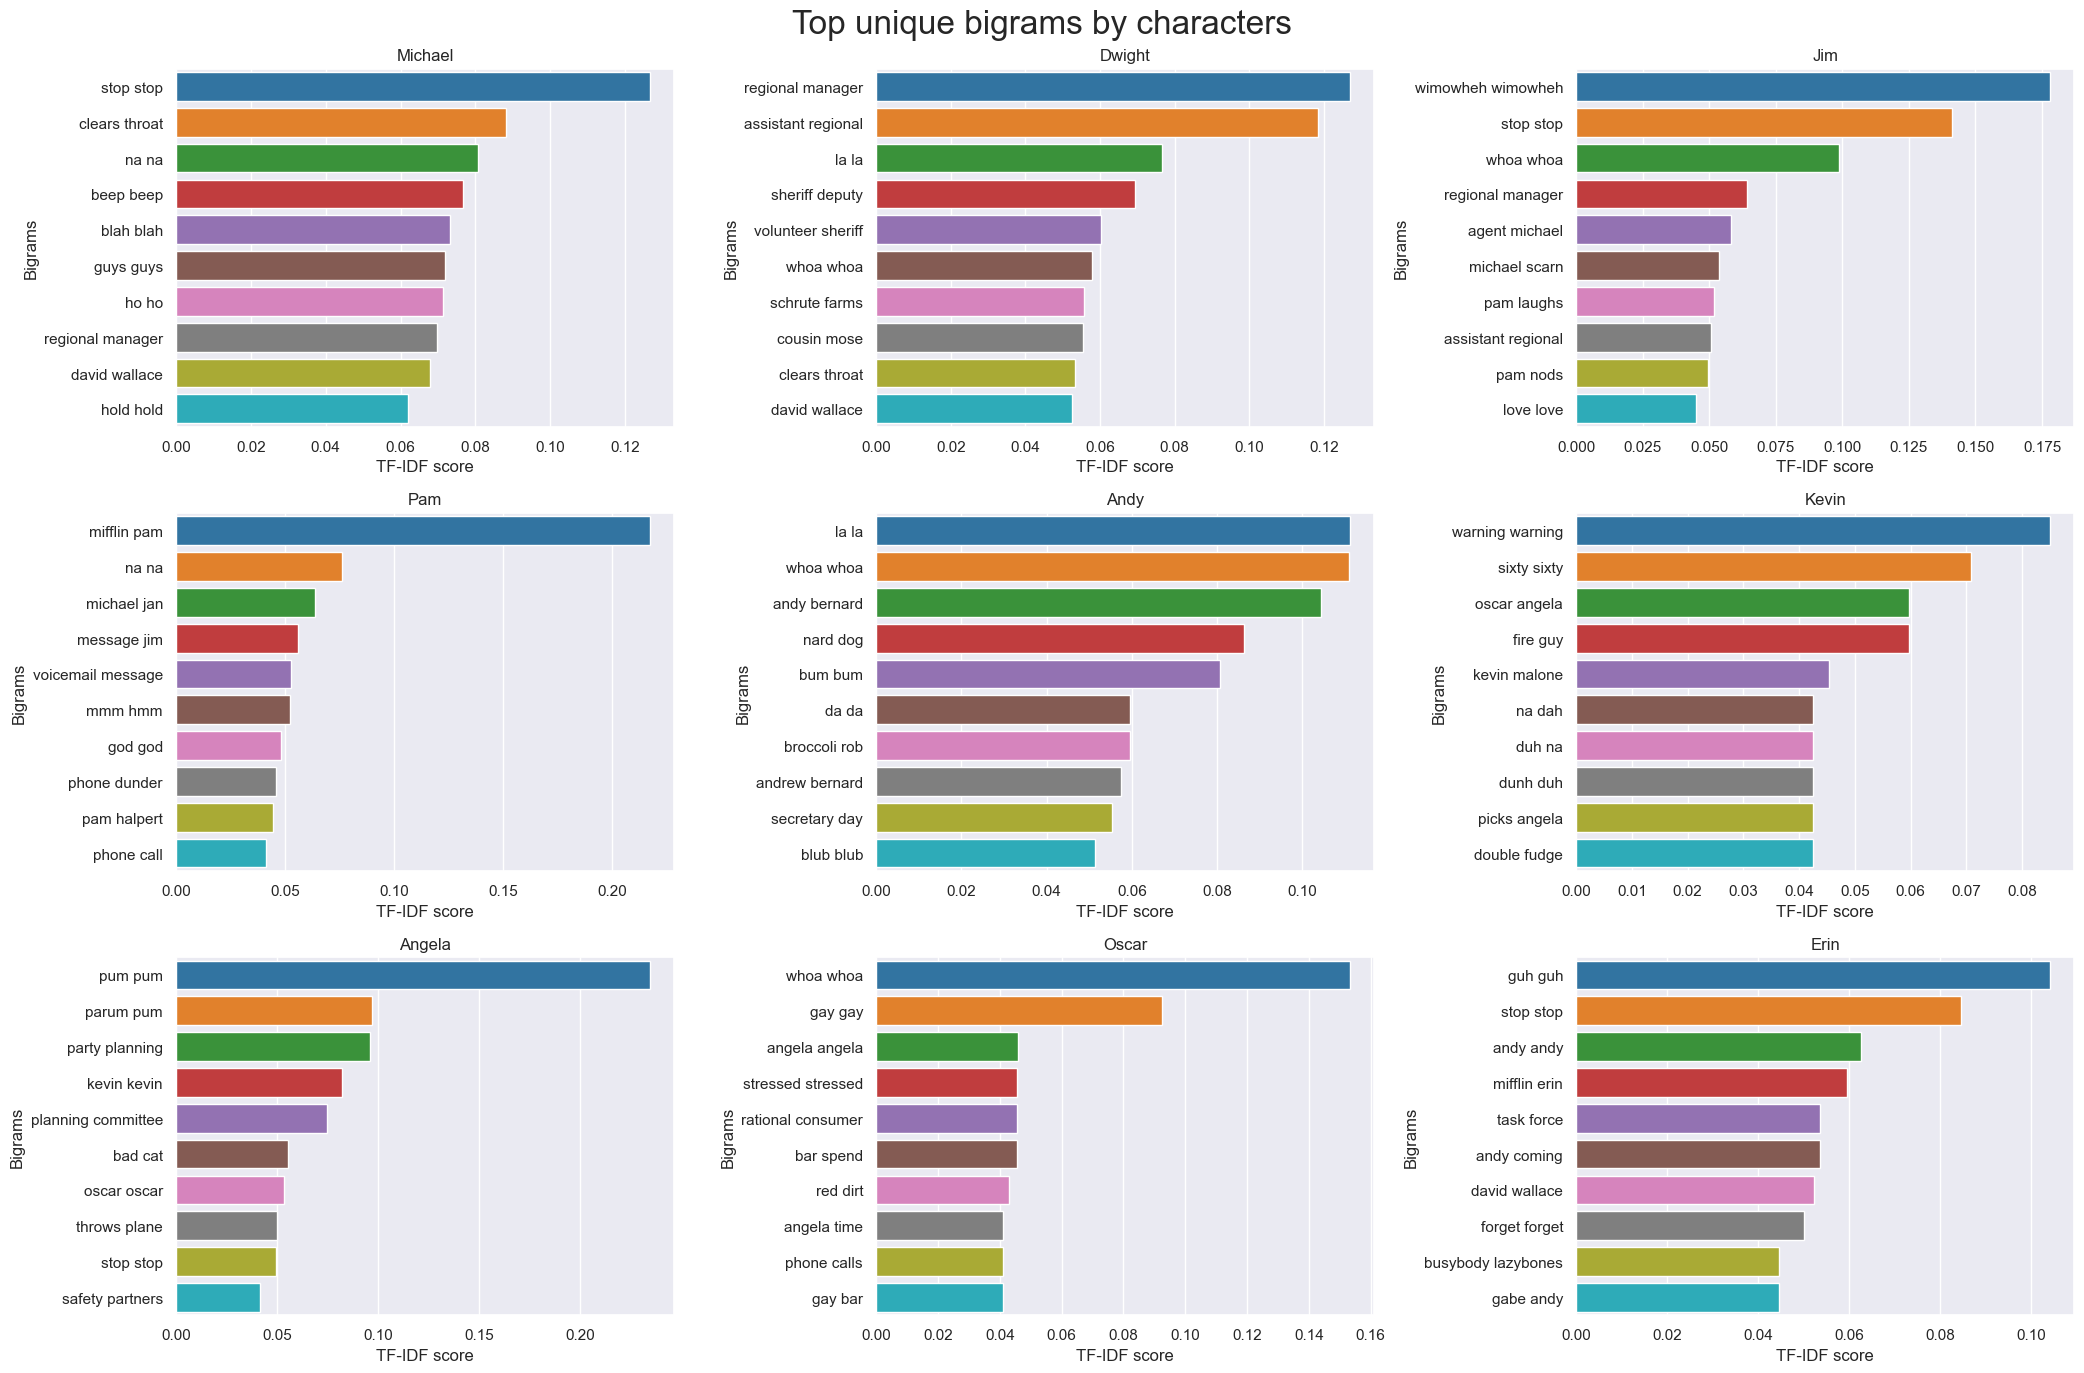

In [96]:
plot_top_unique_ngrams(ngram_range=(2,2), ylabel='Bigrams', title='Top unique bigrams by characters')

In [361]:
def generate_wordcloud(character, img_path=None, out_path=None):
    
    unique_words = get_top_unique_ngrams(n_words=100, ngram_range=(1,1))
    word_dict = unique_words[character]
        
    mask = np.array(Image.open(img_path))    
    wordcloud = WordCloud(width=800, height=400, background_color='white', mode='RGBA', mask=mask).generate_from_frequencies(word_dict)
    
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[7,7])
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
    wordcloud.to_file(out_path)
    plt.axis('off')
    plt.show()

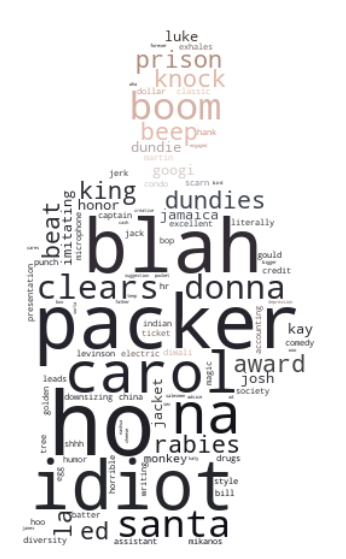

In [367]:
generate_wordcloud(character='Michael', img_path='img/michael.png', out_path='output/tfidf_michael.png')

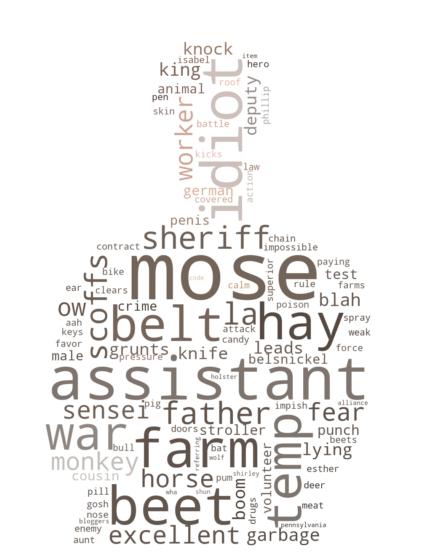

In [370]:
generate_wordcloud(character='Dwight', img_path='img/dwight.png', out_path='output/tfidf_dwight.png')

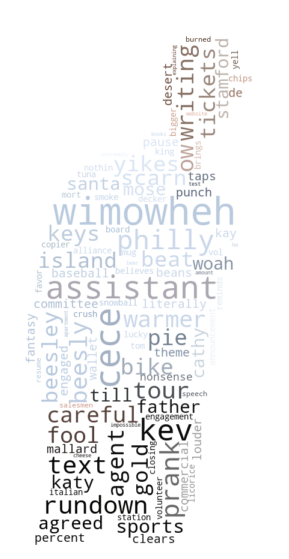

In [368]:
generate_wordcloud(character='Jim', img_path='img/jim.png', out_path='output/tfidf_jim.png')

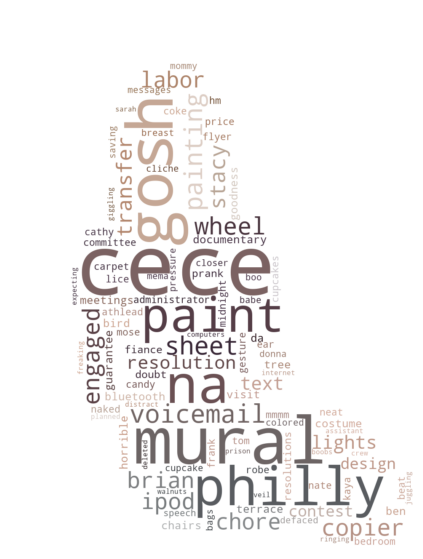

In [369]:
generate_wordcloud(character='Pam', img_path='img/pam.png', out_path='output/tfidf_pam.png')

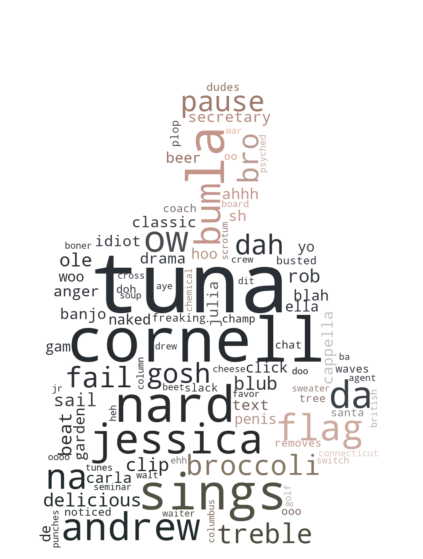

In [373]:
generate_wordcloud(character='Andy', img_path='img/andy.png', out_path='output/tfidf_andy.png')

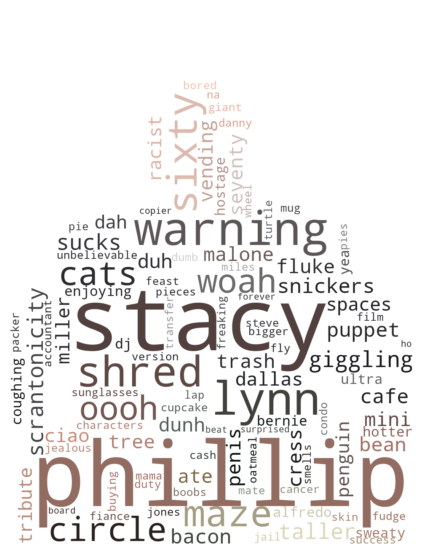

In [372]:
generate_wordcloud(character='Kevin', img_path='img/kevin.png', out_path='output/tfidf_kevin.png')

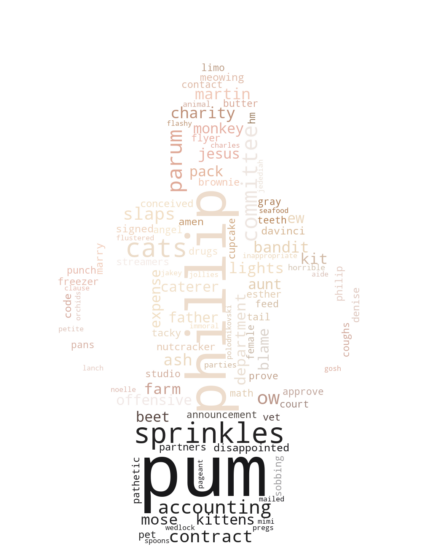

In [378]:
generate_wordcloud(character='Angela', img_path='img/angela.png', out_path='output/tfidf_angela.png')

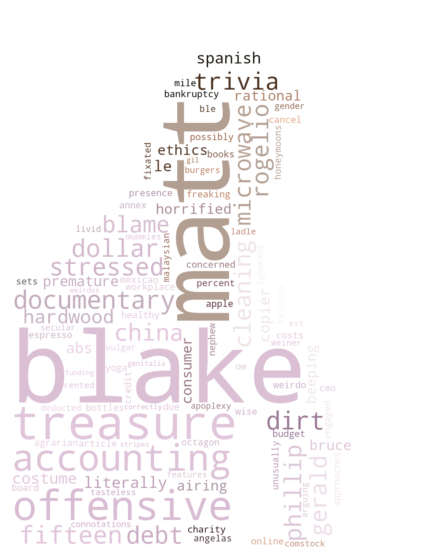

In [379]:
generate_wordcloud(character='Oscar', img_path='img/oscar.png', out_path='output/tfidf_oscar.png')

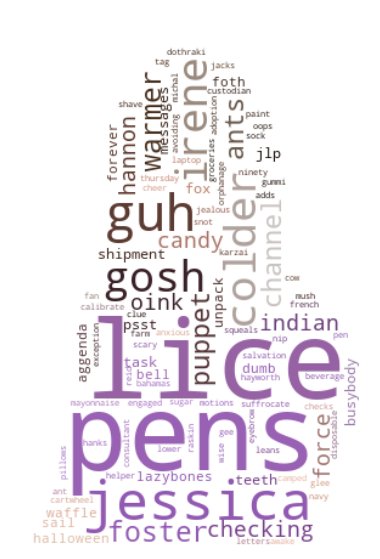

In [380]:
generate_wordcloud(character='Erin', img_path='img/erin.png', out_path='output/tfidf_erin.png')